# Auswertung von R2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Hier werden die R2-Werte der vervollständigten Datensätze visualisiert und die Ergebnistabellen für alle Durchläufe der Experimente erstellt.

In [2]:
set_names = ['r1','r1_detail','r2','r2_detail', 'r3','r3_detail']
sets = []
for name in set_names:
    sets.append(pd.read_csv(f'additional_data/results/{name}.csv'))
sets = {set_names[i]: sets[i] for i in range(len(sets))}

In [3]:
sets['r1_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r2_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r3_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']

sets['r1_detail'].run = sets['r1_detail'].run + 1
sets['r2_detail'].run = sets['r2_detail'].run + 1
sets['r3_detail'].run = sets['r3_detail'].run + 1

sets['r1_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r2_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r3_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)

sets['r1_detail'].set_index(['method', 'run'], inplace=True)
sets['r2_detail'].set_index(['method', 'run'], inplace=True)
sets['r3_detail'].set_index(['method', 'run'], inplace=True)

sets['r1'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r2'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r3'].columns = ['method', 'r2','RMSE','still_missing','t']

sets['r1_detail'].still_missing = sets['r1_detail'].still_missing.astype(int)
sets['r2_detail'].still_missing = sets['r2_detail'].still_missing.astype(int)
sets['r3_detail'].still_missing = sets['r3_detail'].still_missing.astype(int)


sets['r1'].set_index('method', inplace=True)
sets['r2'].set_index('method', inplace=True)
sets['r3'].set_index('method', inplace=True)

## R2 visualisieren

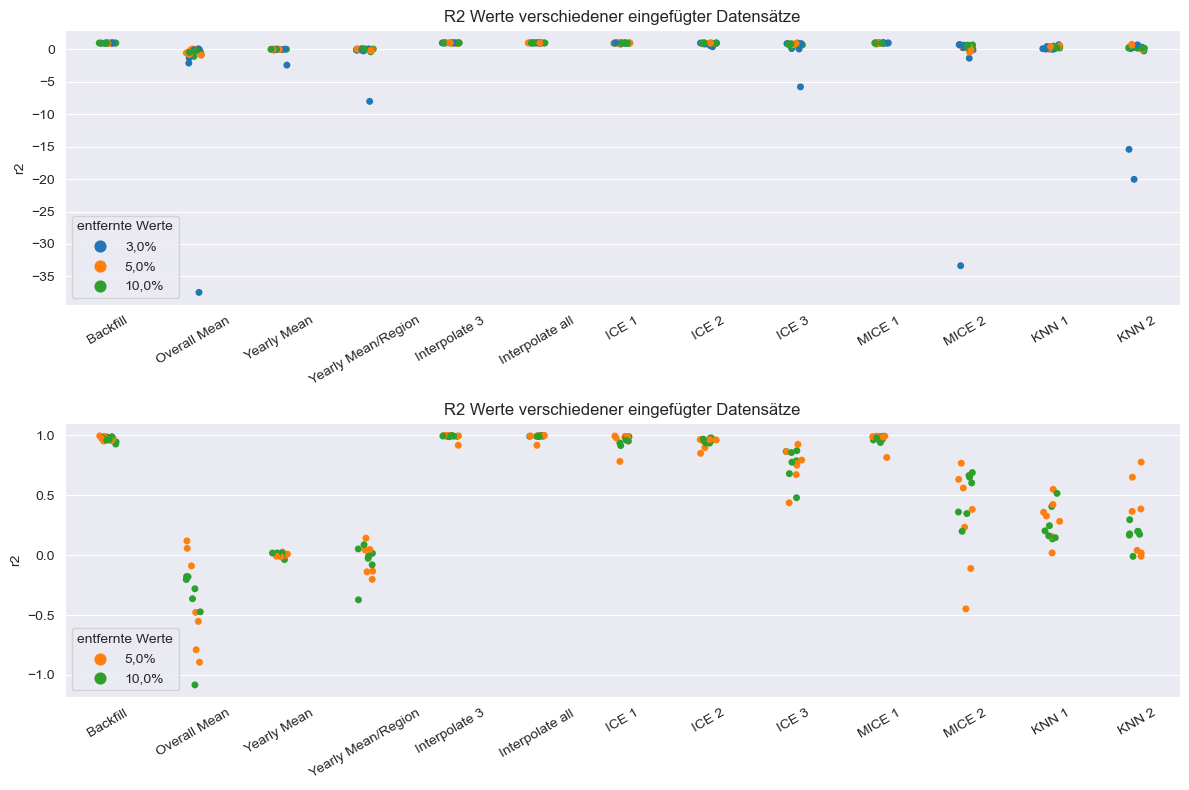

In [4]:
rs = pd.DataFrame({'3,0%': sets['r1_detail'].r2, '5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs = rs.reset_index()

rs2 = pd.DataFrame({'5,0%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs2 = rs.reset_index()
rs2.drop(['index', '3,0%'], axis=1, inplace=True)


d1 = pd.DataFrame(rs.drop('run', axis=1).set_index('method').stack())
d1 = d1.reset_index()
d1.columns = ['Methode', 'entfernte Werte', 'r2']

d2 = pd.DataFrame(rs2.drop('run', axis=1).set_index('method').stack())
d2 = d2.reset_index()
d2.columns = ['Methode', 'entfernte Werte', 'r2']



sns.set_style("darkgrid")
#sns.set_palette("Set1")
sns.set_palette("tab10")

fig, (ax1, ax2) = plt.subplots(figsize =(12, 8), nrows=2)
sns.stripplot(data=d1, x='Methode', y='r2', hue='entfernte Werte', palette=["C0", "C1", "C2", ], ax=ax1)
sns.stripplot(data=d2, x='Methode', y='r2', hue='entfernte Werte', palette=["C1", "C2"], ax=ax2)

ax1.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel('')

ax2.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax2.tick_params(axis='x', rotation=30)
ax2.set_xlabel('')

plt.tight_layout()

plt.savefig('figures/results/r2')

## Tabellen erstellen

In [5]:
print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.97 &  0.15 &      135535.57 &   0.53 \\
Overall Mean           & -5.96 &  1.24 &           0.00 &   0.77 \\
Yearly Mean            & -0.36 &  1.07 &       52298.00 &   0.60 \\
Yearly Mean per Region & -1.18 &  1.09 &       58248.43 &   0.72 \\
Interpolate 3          &  1.00 &  0.04 &      134354.57 &   2.50 \\
Interpolate all        &  1.00 &  0.04 &      112679.29 &   1.78 \\
ICE 1                  &  0.98 &  0.09 &           0.00 &   9.80 \\
ICE 2                  &  0.81 &  0.32 &           0.00 &  25.86 \\
ICE 3                  & -0.29 &  0.51 &           0.00 &  80.76 \\
MICE 1                 &  0.99 &  0.07 &           0.00 & 132.21 \\
MICE 2                 & -4.68 &  0.82 

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\4129489065.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))


In [6]:
print(sets['r2'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.98 &  0.15 &      135735.29 &   0.79 \\
Overall Mean           & -0.38 &  1.52 &           0.00 &   1.03 \\
Yearly Mean            &  0.00 &  1.44 &       52298.00 &   0.87 \\
Yearly Mean per Region & -0.04 &  1.46 &       58352.71 &   0.98 \\
Interpolate 3          &  0.99 &  0.10 &      134538.00 &   2.88 \\
Interpolate all        &  0.99 &  0.10 &      112822.00 &   2.10 \\
ICE 1                  &  0.96 &  0.17 &           0.00 &   9.37 \\
ICE 2                  &  0.94 &  0.35 &           0.00 &  22.79 \\
ICE 3                  &  0.74 &  0.73 &           0.00 &  81.50 \\
MICE 1                 &  0.96 &  0.19 &           0.00 & 131.26 \\
MICE 2                 &  0.29 &  1.00 

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\2753717235.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))


In [7]:
print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{table}
\centering
\caption{Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}
\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               &  0.96 &  0.15 &      136315.29 &   1.45 \\
Overall Mean           & -0.40 &  1.01 &           0.00 &   1.69 \\
Yearly Mean            &  0.01 &  0.88 &       52320.57 &   1.53 \\
Yearly Mean per Region & -0.05 &  0.90 &       58597.43 &   1.63 \\
Interpolate 3          &  0.99 &  0.07 &      135062.14 &   3.71 \\
Interpolate all        &  0.99 &  0.07 &      113218.57 &   2.83 \\
ICE 1                  &  0.96 &  0.17 &           0.00 &   9.98 \\
ICE 2                  &  0.96 &  0.17 &           0.00 &  23.39 \\
ICE 3                  &  0.76 &  0.43 &           0.00 &  81.64 \\
MICE 1                 &  0.97 &  0.14 &           0.00 & 131.95 \\
MICE 2                 &  0.50 &  0.59

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\1507838682.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3'].to_latex(caption= 'Durchschnittliche Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))


In [8]:
print(sets['r1_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.}\\
\toprule
      &   &     r2 &  rmse &  still\_missing &      t \\
method & run &        &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 3\% fehlenden Werten.} \\
\toprule
      &   &     r2 &  rmse &  still\_missing &      t \\
method & run &        &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &   0.99 &  0.01 &         135530 &   0.53 \\
      & 2 &   0.97 &  0.11 &         135514 &   0.52 \\
      & 3 &   0.98 &  0.06 &         135555 &   0.52 \\
      & 4 &   0.95 &  0.12 &         135512 &   0.53 \\
      & 5 &   0.98 &  0.19 &         135536 &   0.53 \\
      & 6 &   0.96 &  0.31 &         135532 &   0.53 \\
      & 7 &   0.99 &  0.24 &         135570 &   0.53

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\4172264568.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1_detail'].to_latex(longtable=True,


In [9]:
print(sets['r2_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &  1.00 &  0.19 &         135735 &   0.79 \\
      & 2 &  0.95 &  0.13 &         135759 &   0.79 \\
      & 3 &  0.98 &  0.10 &         135763 &   0.80 \\
      & 4 &  0.98 &  0.07 &         135732 &   0.79 \\
      & 5 &  0.99 &  0.31 &         135733 &   0.79 \\
      & 6 &  0.97 &  0.11 &         135720 &   0.79 \\
      & 7 &  0.96 &  0.13 &         135705 &   0.79 \\
Overall

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\1743318558.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r2_detail'].to_latex(longtable=True,


In [10]:
print(sets['r3_detail'].to_latex(longtable=True,
                                 caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.}\\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.} \\
\toprule
      &   &    r2 &  rmse &  still\_missing &      t \\
method & run &       &       &                &        \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 1 &  0.93 &  0.14 &         136318 &   1.46 \\
      & 2 &  0.95 &  0.23 &         136383 &   1.45 \\
      & 3 &  0.99 &  0.09 &         136254 &   1.45 \\
      & 4 &  0.99 &  0.13 &         136287 &   1.45 \\
      & 5 &  0.98 &  0.14 &         136382 &   1.45 \\
      & 6 &  0.96 &  0.13 &         136345 &   1.45 \\
      & 7 &  0.97 &  0.21 &         136238 &   1.46 \\
Overa

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_16900\1069224385.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r3_detail'].to_latex(longtable=True,
